In [1]:
import numpy as np
from bezierv.classes.distfit import DistFit
from bezierv.classes.bezierv import Bezierv
import matplotlib.pyplot as plt

In [16]:
from bezierv.algorithms import proj_grad as pg
n = 1
t = np.array([0.0, 0.5, 1.0])
m = t.size
emp_cdf = t.copy()
controls_z = np.array([0.0, 1.0])
bez = Bezierv(n)

g = pg.grad(n, m, t, bez, controls_z, emp_cdf)
print("Gradient:", g)

Gradient: [0. 0.]


In [8]:
np.random.seed(111)

In [23]:
data = np.sort(np.random.normal(loc=1, scale=1, size=10))
distfit = DistFit(data=data, n=3)
print(distfit.init_t)
bezierv_sub, mse_sub = distfit.fit(method='projsubgrad')
bezierv_grad, mse_grad = distfit.fit(method='projgrad')

[0.         0.13267313 0.21365031 0.28064869 0.30230154 0.48824706
 0.58566877 0.59694585 0.61988313 1.        ]


In [24]:
print(mse_sub)
print(mse_grad)

0.0035216294063540577
0.018767647591775655


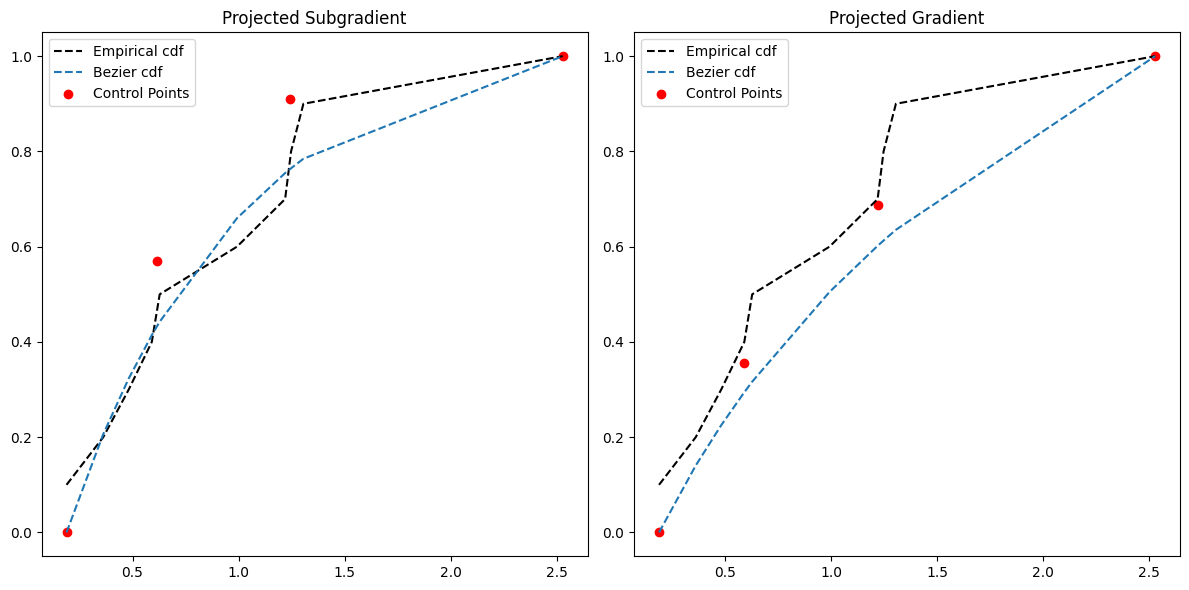

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

bezierv_sub.plot_cdf(data, ax=ax1)

bezierv_grad.plot_cdf(data, ax=ax2)

# Add a title to the subplots
ax1.set_title('Projected Subgradient')
ax2.set_title('Projected Gradient')

# Show the plot
plt.tight_layout()
plt.show()

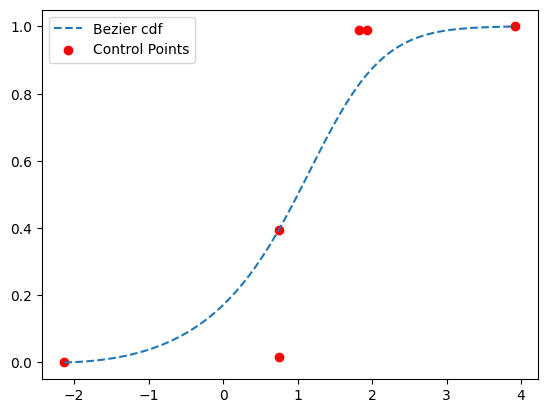

In [5]:
data = np.random.normal(loc=1, scale=1, size=500)
distfit = DistFit(data=data)
bezierv_x = distfit.fit(method='nonlinear')
bezierv_x.plot_cdf()

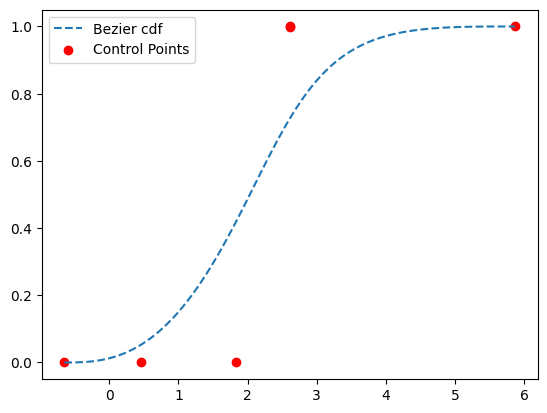

In [6]:
data = np.random.normal(loc=2, scale=1, size=500)
distfit = DistFit(data=data)
bezierv_y = distfit.fit(method='nonlinear')
bezierv_y.plot_cdf()

In [7]:
from bezierv.classes.convolver import Convolver
convolver = Convolver(bezierv_x, bezierv_y, 1000)
bezierv_conv, mse = convolver.conv(method='nonlinear')

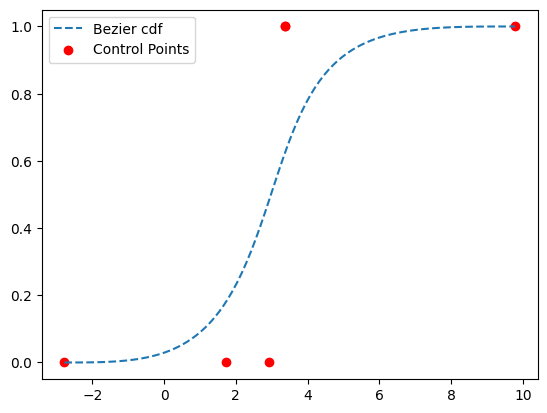

In [8]:
bezierv_conv.plot_cdf()